In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [ ]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv('/content/diabetes.csv', header =0,names =col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x = data[feature_cols]
y = data.label

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y ,test_size =0.3 , random_state=5)

display(x_train.shape,y_train.shape,x_train.shape,y_test.shape)

(537, 7)

(537,)

(537, 7)

(231,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = SVC(kernel = 'rbf',random_state = 0)
model.fit(x_train,y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction: ',svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernel -rbf]')
print('Confusion Matrix: ',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,svc_prediction)
print('Accuracy score: ',Accuracy_score)
print("Accuracy in Percentage: ",int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [kernel -rbf]
Confusion Matrix:  [[135  25]
 [ 22  49]]
Accuracy score:  0.7965367965367965
Accuracy in Percentage:  79 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.69      0.66      0.68        74

    accuracy                           0.80       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.79      0.80      0.80       231



In [ ]:
model = SVC(kernel = 'linear',random_state = 0)
model.fit(x_train,y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction: ',svc_prediction)

svc_prediction:  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


[Text(0.5, 1.0, 'SVC[rbf]')]

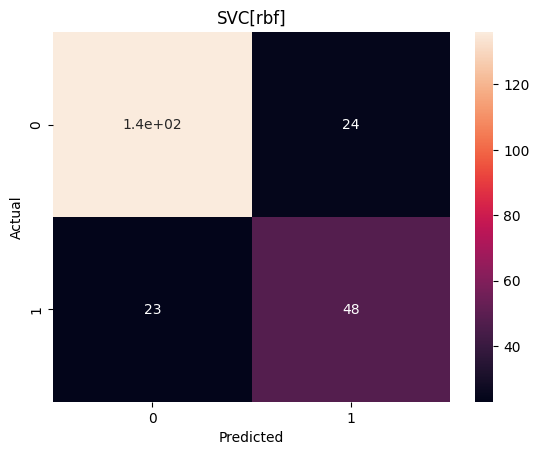

In [ ]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC[rbf]')

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernel -linear]')
print('Confusion Matrix: \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,svc_prediction)
print('Accuracy score: ',Accuracy_score)
print("Accuracy in Percentage: ",int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [kernel -linear]
Confusion Matrix: 
 [[136  24]
 [ 23  48]]
Accuracy score:  0.7965367965367965
Accuracy in Percentage:  79 %
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       159
           1       0.68      0.67      0.67        72

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



[Text(0.5, 1.0, 'SVC[linear]')]

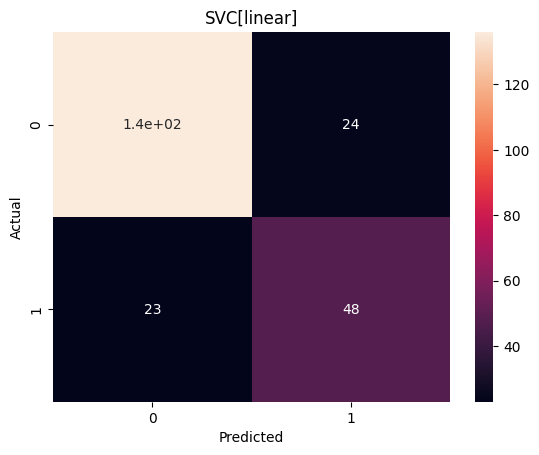

In [ ]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC[linear]')